<a href="https://colab.research.google.com/github/nchebet09/Naomi-s-Week-4-IP-Core/blob/master/Naomi's_Core_Week_4_IP_on_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Dataset an Initial Exploration

In [1]:
# importing our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading data
# url = http://bit.ly/DSCoreAutolibDataset

autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [4]:
autolib.shape

(16085, 13)

In [5]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [6]:
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [7]:
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [8]:
autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [9]:
# checking for unique values in each column
autolib['Postal code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [10]:
autolib['date'].unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [11]:
autolib['n_daily_data_points'].unique()

array([1440, 1438, 1439, 1320, 1437, 1434, 1398, 1420, 1425, 1396, 1429,
       1389, 1380, 1364, 1318, 1377, 1203, 1417, 1435, 1174, 1436, 1411,
       1370])

In [12]:
autolib['dayOfWeek'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [13]:
autolib['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [14]:
autolib['BlueCars_taken_sum'].unique()

array([ 110,   98,  138,  104,  114,  187,  180,   84,   81,   88,  125,
        126,  224,  193,  107,  116,  118,  122,  130,  217,  143,  123,
        112,  108,  145,  216,  190,   83,  103,  146,  199,  186,  121,
        113,  109,  207,  160,  115,   94,   99,  119,  176,  157,   85,
        100,  135,    8,   92,  127,  136,  192,  168,  102,  134,  197,
        173,  131,  196,  150,  156,  231,  105,  219,  179,  124,  188,
        139,   97,  120,  159,  147,  151,  129,  152,  142,  141,  202,
        175,   96,  133,  254,  137,  185,  203,    6,  166,  165,  243,
        264,  213,  164,  163,  191,  276,  210,  183,  148,  270,  128,
        280,  178,  153,  158,  259,  161,  240,   12,  181,  140,  263,
        167,  177,  250,  208,  171,  266,  155,  247,  154,  184,  293,
        228,  182,  144,  218,  162,  239,  200,  170,  174,  172,  245,
          5,  195,  237,  331,  283,  212,  211,  380,  356,  233,  220,
        238,  384,  313,  229,  221,  201,  350,  3

In [15]:
autolib['BlueCars_returned_sum'].unique()

array([ 103,   94,  139,  104,  117,  185,  180,   83,   84,   85,  125,
        127,  223,  193,  107,  116,  118,  122,  130,  217,  150,  113,
        146,  218,  189,   81,  110,  147,  204,  121,   99,  112,  109,
        207,  165,  111,   93,  119,  176,  158,   86,   98,  135,    9,
         91,  131,  137,  138,  208,  177,  124,  101,  145,  203,  169,
         96,  136,  142,  196,  154,  100,   97,  144,  128,  179,  151,
        115,  232,  105,  219,  143,  190,  102,  159,  155,  156,  120,
        141,  201,  133,  253,  199,   95,  108,  188,  126,  206,  174,
          7,  244,  197,  153,  264,  148,  164,  277,  213,  149,  175,
        270,  198,  280,  161,  178,  152,  160,  257,  205,  240,  123,
        157,   12,  265,  186,  173,  140,  171,  167,  255,  209,  170,
        266,  248,  243,  183,  292,  222,  134,  236,  132,  181,  172,
        184,  168,  162,  237,  163,  233,  202,  283,  192,  252,  211,
          6,  250,  187,  229,  249,  338,  293,  2

In [16]:
autolib['Slots_freed_sum'].unique()

array([ 22,  23,  27,  25,  18,  38,  34,  14,  15,  11,  19,  16,  21,
        17,  41,  24,  20,  35,  36,  32,  13,  28,  12,  26,   0,  48,
        30,  29,  31,  47,  33,  40,  37,   9,  10,  43,  44,  49,  39,
        42,  45,  51,  46,  59,  64,  56,  52,   1,  50,  95,  84,  83,
        81,  58,  61,  67, 101,  86,  63,  97,  60,  57,  65,  80,  79,
        77,  54,  85,  75,  73,  55,   3,  62,  82,  71,  69,  74,  89,
        91, 109,  70,  76,  72,  68,  78,  53,  66,  87,   2,   5, 120,
       111,  92, 110,  88, 103, 142, 115, 105, 113, 121,  96,  90, 134,
       140, 130,  94,  99, 128, 100, 129,  98, 118, 106, 119, 117, 102,
       107,  93, 135, 104, 122, 133, 108, 112, 116, 123, 136, 126,   6,
       114, 132, 177, 167, 125, 124, 131, 143, 139, 137, 153, 180, 157,
       162, 152, 151, 149, 156, 145, 173, 147, 211, 127, 141, 161, 144,
       163, 138, 171, 158, 148, 168, 154, 166, 150, 170, 146, 165, 178,
       174, 175, 176, 181, 190, 160, 184, 205, 253, 252, 155, 19

In [17]:
autolib['Slots_taken_sum'].unique()

array([ 20,  22,  27,  21,  35,  34,  15,  13,  38,  19,  39,  25,  14,
         9,  37,  36,  30,  16,  11,  28,  33,  18,  12,   0,  31,  23,
        26,  50,  17,  40,  24,  48,  32,   8,  29,  42,  43,  49,  45,
        41,  44,  52,  59,  46,  65,  47,  57,  51,   1,  97,  87,  54,
        84,  83,  60,  69, 103,  58,  62,  92,  67,  78,  82,  77,  53,
        88,  72,  66,  99,  64,  55,  75, 113,  63,  74,  71,  89,  68,
        81,  73,  70,  61,  79,  56,  76,  86,   2, 118, 108, 107, 144,
       114,  93, 105, 106, 115, 122,  90,  80,  98,  85, 139, 136, 128,
        94, 126,  95,   4, 130, 102,  96, 129, 138, 111, 124, 101, 109,
       116, 110, 134,  91, 119, 137, 100,   3, 104, 112,   6, 177, 125,
       120, 123, 131, 135, 140, 132, 155, 182, 154, 164, 121, 151, 157,
       147, 117, 153, 160, 141, 172, 161,   5, 213, 145, 143, 162, 127,
       148, 169, 149, 171, 167, 163, 166, 133, 158, 159, 150, 174, 173,
       178, 152,   7, 176, 179, 165, 180, 142, 188, 185, 183,  1

## Data Cleaning

In [18]:
# step 1: aligning column names i.e removing spaces, caps

autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('_sum', '')
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken,bluecars_returned,utilib_taken,utilib_returned,utilib_14_taken,utilib_14_returned,slots_freed,slots_taken
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [19]:
# step 2: Converting date to the datetime frame and checking to make sure that the date has been converted:
autolib['date'] = pd.to_datetime(autolib['date'])
autolib.dtypes


postal_code                     int64
date                   datetime64[ns]
n_daily_data_points             int64
dayofweek                       int64
day_type                       object
bluecars_taken                  int64
bluecars_returned               int64
utilib_taken                    int64
utilib_returned                 int64
utilib_14_taken                 int64
utilib_14_returned              int64
slots_freed                     int64
slots_taken                     int64
dtype: object

In [20]:
# step 3: drop the unnecessary columns. Our focus is on Bluecars, 
# thus we will drop the other car columns including n_daily_data_points since we dont need the column as well

autolib.drop(autolib.columns[7:13], axis=1, inplace=True)
autolib.drop(['n_daily_data_points'], axis=1, inplace=True)
autolib.head()

,postal_code,date,dayofweek,day_type,bluecars_taken,bluecars_returned
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117


In [21]:
# step 4: checking for duplicates

autolib.columns.duplicated()

# There are no duplicates in our dataset

array([False, False, False, False, False, False])

In [22]:
# step 5: checking for statistical summary of the remaining data
autolib.describe()

,postal_code,dayofweek,bluecars_taken,bluecars_returned
count,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,2.969599,125.926951,125.912714
std,7647.342000,2.008378,185.426579,185.501535
min,75001.000000,0.000000,0.000000,0.000000
25%,91330.000000,1.000000,20.000000,20.000000
50%,92340.000000,3.000000,46.000000,46.000000
75%,93400.000000,5.000000,135.000000,135.000000
max,95880.000000,6.000000,1352.000000,1332.000000


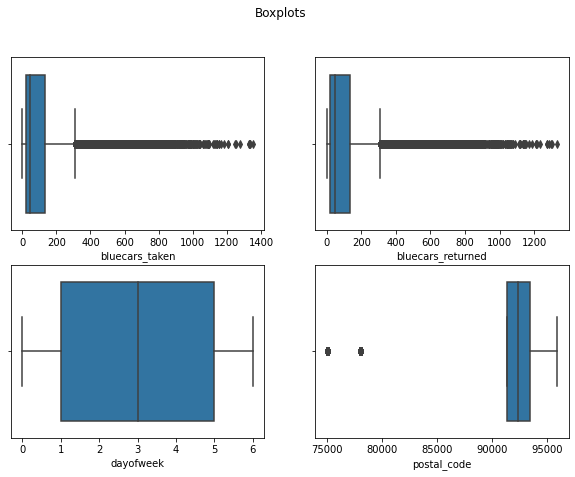

In [23]:
# step 6: checking for outliers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(autolib['postal_code'], ax=ax4)
sns.boxplot(autolib['dayofweek'], ax=ax3)
sns.boxplot(autolib['bluecars_taken'], ax=ax1)
sns.boxplot(autolib['bluecars_returned'], ax=ax2)
plt.show()

## Exploratory Data Analysis

### 1. Univariate Analysis

In [24]:
# calculating the mean of bluecars returned

autolib['bluecars_returned'].mean()

125.912713708424

In [25]:
# calculating the mean of bluecars taken

autolib['bluecars_taken'].mean()

125.92695057506994

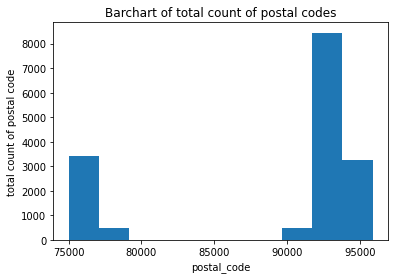

In [26]:
# plotting a histogram for postal code to see the distribution

postal_code = autolib['postal_code']

plt.hist(postal_code, histtype='bar', rwidth=1)
plt.xlabel('postal_code')
plt.ylabel('total count of postal code')
plt.title('Barchart of total count of postal codes')
plt.show()

From the chart, we see that most of the data collected was from 90000 plus posta code

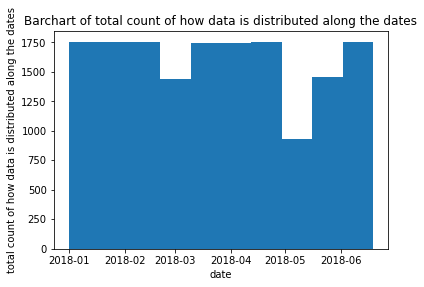

In [27]:
# plotting a histogram for postal code to see the distribution
date = autolib['date']

plt.hist(date, histtype='bar', rwidth=1)
plt.xlabel('date')
plt.ylabel('total count of how data is distributed along the dates')
plt.title('Barchart of total count of how data is distributed along the dates')
plt.show()

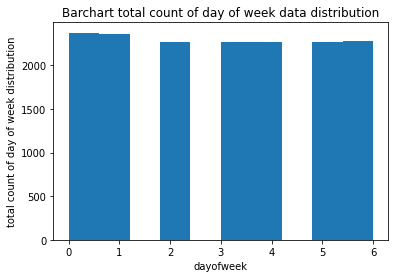

In [28]:
# plotting a histogram for day of the week to see the distribution
dayofweek = autolib['dayofweek']

plt.hist(dayofweek, histtype='bar', rwidth=1)
plt.xlabel('dayofweek')
plt.ylabel('total count of day of week distribution')
plt.title('Barchart total count of day of week data distribution')
plt.show()

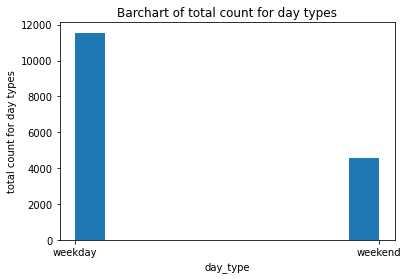

In [29]:
# plotting a histogram for day of the week to see the distribution
day_type = autolib['day_type']

plt.hist(day_type, histtype='bar', rwidth=1)
plt.xlabel('day_type')
plt.ylabel('total count for day types')
plt.title('Barchart of total count for day types')
plt.show()

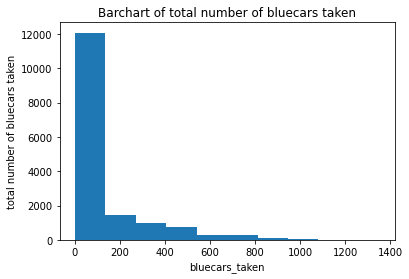

In [30]:
# plotting a histogram for day of the week to see the distribution
bluecars_taken = autolib['bluecars_taken']

plt.hist(bluecars_taken, histtype='bar', rwidth=1)
plt.xlabel('bluecars_taken')
plt.ylabel('total number of bluecars taken')
plt.title('Barchart of total number of bluecars taken')
plt.show()

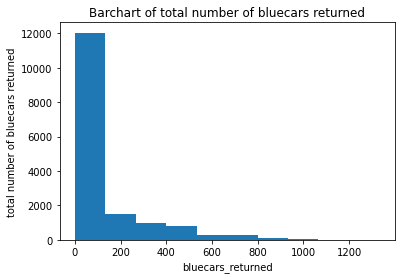

In [31]:
# plotting a histogram for day of the week to see the distribution
bluecars_returned = autolib['bluecars_returned']

plt.hist(bluecars_returned, histtype='bar', rwidth=1)
plt.xlabel('bluecars_returned')
plt.ylabel('total number of bluecars returned')
plt.title('Barchart of total number of bluecars returned')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dd6ee3a20>,
      dtype=object)

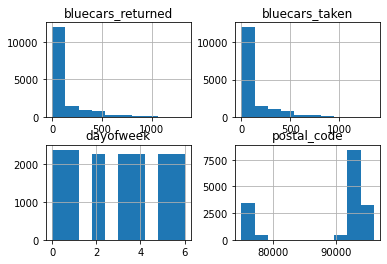

In [32]:
# plotting univariate summaries

autolib.hist()

### 2. Bivariate Analysis

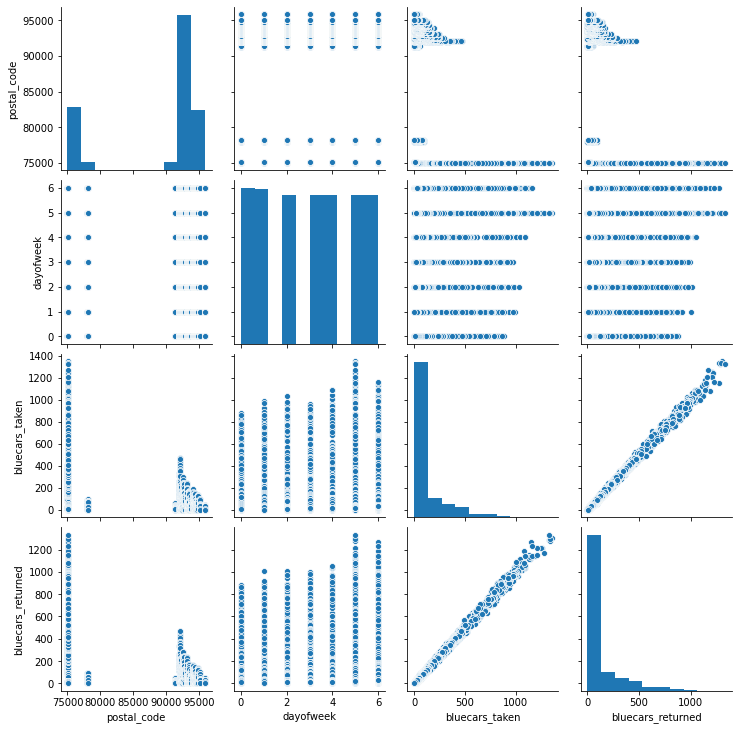

In [36]:
# Plotting bivariate summaries
sns.pairplot(autolib)
plt.show()

In [40]:
# grouping by postal code

autolib_postal_code_grouped = autolib.pivot_table(['bluecars_taken', 'dayofweek',
                        'bluecars_returned',], ['postal_code'], aggfunc='sum')

autolib_postal_code_grouped.reset_index()

,postal_code,bluecars_returned,bluecars_taken,dayofweek
0,75001,20974,20995,463
1,75002,27129,27143,463
2,75003,37154,37188,463
3,75004,31449,31454,463
4,75005,47753,47766,463
...,...,...,...,...
99,94700,5289,5288,463
100,94800,12477,12486,463
101,95100,3729,3743,463
102,95870,2374,2378,463


In [41]:
autolib.head()

,postal_code,date,dayofweek,day_type,bluecars_taken,bluecars_returned
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117
